# Figure 1: Manybody potential

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import include.colors as colortools
from matplotlib.patches import Circle
import matplotlib as mpl
import matplotlib.colors as mplcolors

In [5]:
import os
try:
    fm = mpl.font_manager.json_load(os.path.expanduser("~/.cache/matplotlib/fontlist-v310.json"))
    fm.findfont("serif", rebuild_if_missing=False)
except:
    pass

## Setup colors for plots

In [6]:
plot_colors = colortools.get_linear_colors('viridis',10)


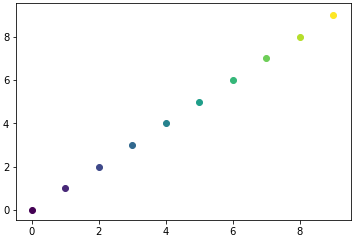

In [7]:
fig, ax = plt.subplots()
for i,c in enumerate(plot_colors):
    ax.scatter(i,i,c=c)

In [8]:
dark_purple = plot_colors[0]
purple = plot_colors[1]
dark_blue = plot_colors[2]
blue = plot_colors[3]
teal = plot_colors[4]
aquamarine = plot_colors[5]
green = plot_colors[6]
light_green = plot_colors[7]
dead_grass = plot_colors[8]
yellow = plot_colors[9]

In [9]:
plotDir = "./plots/"

In [10]:
Vmesh = np.loadtxt('data/Vmesh.raw')
rmeshpoints = np.loadtxt('data/rmeshpoints.raw')
stackedcutpoints = np.loadtxt('data/stackedcutpoints.raw')

In [11]:
x = rmeshpoints[:,0]
y = rmeshpoints[:,1]
z = Vmesh

In [12]:
from scipy.interpolate import griddata
grid_x, grid_y = np.mgrid[np.min(rmeshpoints[:,0]):np.max(rmeshpoints[:,0]):1000j, np.min(rmeshpoints[:,1]):np.max(rmeshpoints[:,1]):1000j]
grid_z0 = griddata((x,y), Vmesh, (grid_x, grid_y), method='nearest')
grid_z1 = griddata((x,y), Vmesh, (grid_x, grid_y), method='linear')
grid_z2 = griddata((x,y), Vmesh, (grid_x, grid_y), method='cubic')

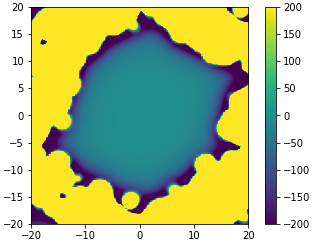

In [13]:
extent = (np.min(x),np.max(x),np.min(y),np.max(y))
fig,ax=plt.subplots()
im = ax.imshow(grid_z1.T,origin='lower',extent=extent,vmax=200,vmin=-200)
cbar = fig.colorbar(im)
# fn = 'test'
# fig.savefig(fn + '.svg')
# fig.savefig(fn + '.png',dpi=400)

In [14]:
ax1,ax2,ay1,ay2 = np.load('data/mcm41UCdata.npy')

In [15]:
xArr = []
yArr = []
zArr = []
for i in range(-3,3+1):
    for j in range(-3,3+1):
        xArr.append(x+(ax1*i + ax2*j))
        yArr.append(y+(ay1*i + ay2*j))
        zArr.append(z)
xx = np.array(xArr).flatten()
yy = np.array(yArr).flatten()
zz = np.array(zArr).flatten()

In [16]:
from scipy.interpolate import griddata
xmin = -60
xmax = 60
ymin = -60
ymax = 60
grid_x, grid_y = np.mgrid[xmin:xmax:10000j, ymin:ymax:10000j]
#grid_z0 = griddata((x,y), Vmesh, (grid_x, grid_y), method='nearest')
grid_z1 = griddata((xx,yy), zz, (grid_x, grid_y), method='linear')
#grid_z2 = griddata((x,y), Vmesh, (grid_x, grid_y), method='cubic')

<a id='section2'></a>

'cmunrm.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'cmunrm.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


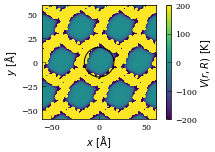

In [17]:
plt.style.reload_library()
with plt.style.context('./include/aps.mplstyle'):
    extent = (xmin,xmax,ymin,ymax)
    fig,ax=plt.subplots()
    ax.set_aspect('equal')
    im = ax.imshow(grid_z1.T,origin='lower',extent=extent,vmax=200,vmin=-200,cmap="viridis")
    circ = Circle((.2,0),15.51,facecolor='None',edgecolor='k')
    ax.add_patch(circ)
    cbar = fig.colorbar(im)
    ax.set_xlabel(r'$x$ $\mathrm{[\AA]}$')
    ax.set_ylabel(r'$y$ $\mathrm{[\AA]}$')
    cbar.set_label(r'$V(r,R)$ $\mathrm{[K]}$')
    fn = 'manybodyPotential'
    #fig.savefig(plotDir + fn + '.svg')
    fig.savefig(plotDir + fn + '.pdf')
    #fig.savefig(plotDir + fn + '.png',dpi=400)


In [18]:
from IPython.display import Markdown

In [19]:
echo = f"""
[test]({plotDir}{fn}.pdf)
"""

Markdown(echo)


[test](./plots/manybodyPotential.pdf)


{{plotDir + fn + '.pdf'}}

[test](https://google.com)

# Figure 2: Effective potential

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import include.colors as colortools

In [21]:
from scipy.special import ellipk, ellipe

def V(rho,sigma,n,R):
    pf = np.pi*n*(sigma**3)/3.0
    t9 = v9(rho/R)*((sigma/R)**9)
    t3 = v3(rho/R)*((sigma/R)**3)
    return pf*(t9-t3)

def Vshell(rho,sigma,n,R1,R2):
    pf = np.pi*n*(sigma**3)/3.0
    t9 = v9(rho/R1)*((sigma/R1)**9)
    t3 = v3(rho/R1)*((sigma/R1)**3)
    y9 = v9(rho/R2)*((sigma/R2)**9)
    y3 = v3(rho/R2)*((sigma/R2)**3)
    return pf*(y3-y9+t9-t3)

def v9(x):
    pf = 1.0/(240.0*((1.0-(x**2))**9))
    t1 = (1091.0 + (11156.0*(x**2)) + (16434.0*(x**4)) + (4052.0*(x**6)) + (35*(x**8)))*ellipe(x**2)
    t2 = 8.0 * (1.0-(x**2)) * (1.0 + (7.0*(x**2))) * (97.0 + (134.0*(x**2)) + (25.0*(x**4))) * ellipk(x**2)
    return pf*(t1-t2)

def v3(x):
    pf = 2.0/((1.0-(x**2))**3)
    t1 = (7.0 + (x**2)) * ellipe(x**2)
    t2 = 4.0 * (1.0-(x**2)) * ellipk(x**2)
    return pf*(t1-t2)

def U_LJ(r,sigma,epsilon):
    pf = 4.0 * epsilon
    t12 = (sigma/r)**12
    t6 = (sigma/r)**6
    return pf * (t12 - t6)

In [22]:
R = 15.51
R2 = R + 3.76
ss = 3.02250
es = 3.61361

In [23]:
# sigma and epsilon parameters for atoms in silica and helium
# See https://doi.org/10.1016/j.apsusc.2015.01.084 and https://doi.org/10.1016/S0927-7757(01)00628-8
sigmaarr = np.array([(3.804,3.033,2.846,2.640,3.405,2.782)],dtype=[('Si','f'),('O','f'),('H','f'),('He','f'),('Ar','f'),('Ne','f')])
epsilonarr = np.array([(155.858,48.115,0.0503,10.9,119.8,37.29134539)],dtype=[('Si','f'),('O','f'),('H','f'),('He','f'),('Ar','f'),('Ne','f')])

# functions to mix the LJ parameters
# See https://doi.org/10.1016/S0927-7757(01)00628-8
def mixsigma(s1,s2):
    return (s1+s2)/2.0

def mixepsilon(e1,e2):
    return (e1*e2)**0.5

In [24]:
r = np.linspace(0,17,10000)
V_MCM41 = V(r,3.44,1.59,R)

In [25]:
# Argon density
SA = 915.0*1e20 #surface area \AA^2/g
MLC = 8.994e-3 #monolayer argon coverage mol/g
n_2d = 6.022140857e23*MLC/SA #argon atoms per \AA^2
n_3d = n_2d/3.5
n_3dArPaulWiki = n_3d




# Neon Density
argonMass = 39.948 #g/mole
argonRadius = 188e-12 #m
NA = 6.022140758e23 #atoms/mole
L_to_m3 = 0.001 #m^3/L

argonDensitySolid = 1616 #g/L
n_3dArFromSolidDensity = (((argonDensitySolid/L_to_m3)/argonMass)*NA*((1e-10)**3)) #atoms/m^3

argonDensityLiquid = 1395.4 #g/L
n_3dArFromLiquidDensity = (((argonDensityLiquid/L_to_m3)/argonMass)*NA*((1e-10)**3)) #atoms/m^3

argonDensityArr = [n_3dArFromSolidDensity,n_3dArFromLiquidDensity,n_3dArPaulWiki]

print(r'{:.3f}$\mathrm{{Å}}^{{-3}}$'.format(n_3d))

0.017$\mathrm{Å}^{-3}$


In [26]:
sArHe = mixsigma(sigmaarr['He'],sigmaarr['Ar'])
eArHe = mixepsilon(epsilonarr['He'],epsilonarr['Ar'])
print(sArHe)
print(eArHe)

[3.0225]
[36.13613]


In [27]:
vdwrAr = 1.88

In [28]:
1.88*2

3.76

In [29]:
V_ArArr = []
for n_3dAr in argonDensityArr:
    V_Ar = Vshell(r,sArHe,eArHe*n_3dAr,R-(vdwrAr*2),R)
    V_ArArr.append(V_Ar)

In [30]:
#np.savetxt('HeArMCM41.dat',np.vstack((r,V_ArArr[-1])).T)

In [31]:
effective_potential_Ar = (np.array(V_ArArr) + V_MCM41)

In [32]:
effective_potential_Ar.T

array([[-9.27723897, -8.96220753, -8.57164939],
       [-9.27723952, -8.96220805, -8.57164987],
       [-9.27724119, -8.96220962, -8.57165131],
       ...,
       [        nan,         nan,         nan],
       [        nan,         nan,         nan],
       [        nan,         nan,         nan]])

In [33]:
eArHe[0]

36.13613

In [34]:
effective_potential_Ar2 = np.zeros((effective_potential_Ar.shape[1],4))

In [35]:
effective_potential_Ar2[:,0] = r
effective_potential_Ar2[:,1:] = effective_potential_Ar.T

In [36]:
effective_potential_Ar2[:,0]

array([0.00000000e+00, 1.70017002e-03, 3.40034003e-03, ...,
       1.69965997e+01, 1.69982998e+01, 1.70000000e+01])

In [37]:
np.save("data/effective_potential_Ar",effective_potential_Ar2)

In [38]:
np.save("data/argon_density",np.array(argonDensityArr))

In [39]:
np.savez("data/effective_potential_MCM41",effective_potential=V_MCM41,distance_from_center=r)

#### Minimum of potentials

In [40]:
def minimize_me_V(r,shell_density,R=15.51,shell_thickness=3.76,shell_sigma=3.0225,shell_epsilon=36.13613,medium_sigma=3.44,medium_n=1.59):
    V_medium = V(r,medium_sigma,medium_n,R)
    V_shell = Vshell(r,shell_sigma,shell_epsilon*shell_density,R-shell_thickness,R)
    return V_medium + V_shell

In [41]:
from scipy.optimize import minimize

In [42]:
shell_density = n_3dArFromLiquidDensity
R=15.51
shell_thickness=3.76
shell_sigma=3.0225
shell_epsilon=36.13613
sigma_medium=3.44
n_medium=1.59

In [43]:
result = minimize(minimize_me_V,9.195,args=(shell_density,R,shell_thickness,shell_sigma,shell_epsilon,sigma_medium,n_medium))

In [44]:
def find_minimum_r_and_V(density_array,x0=9.195,R=15.51,shell_thickness=3.76,shell_sigma=3.0225,shell_epsilon=36.13613,medium_sigma=3.44,medium_n=1.59):
    V_minimums = np.zeros_like(density_array)
    r_minimums = np.zeros_like(density_array)
    for i,p in enumerate(density_array):
        result = minimize(minimize_me_V,x0,args=(p,R,shell_thickness,shell_sigma,shell_epsilon,medium_sigma,medium_n))
        V_minimums[i] = result.fun
        r_minimums[i] = result.x[0]
    return r_minimums, V_minimums

In [45]:
argonDensityr_mins,argonDensityV_mins=find_minimum_r_and_V(argonDensityArr)

In [46]:
argonDensityV_mins

array([-89.56181775, -81.70047666, -71.97750426])

In [47]:
argonDensityr_mins

array([9.18698308, 9.19383921, 9.20558228])

In [48]:
argonDensityArr

[0.02436111811587063, 0.021035584293865026, 0.016912766547340516]

In [49]:
different_densities = np.linspace(0.01,0.03,101)

In [50]:
r_mins,V_mins=find_minimum_r_and_V(different_densities)

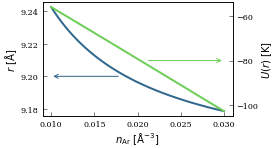

In [51]:
plt.style.reload_library()
with plt.style.context('./include/aps.mplstyle'):
    # Do many densities here and put a line through them, hilight three points from other plot
    fig,ax = plt.subplots()
    ax2 = ax.twinx()
    ax.plot(different_densities,r_mins, color=plot_colors[3], lw=2)
    ax2.plot(different_densities,V_mins, color=plot_colors[-3], lw=2)
    ax.set_xlabel(r'$n_\mathrm{Ar}\ \mathrm{[\AA^{-3}]}$')
    ax.set_ylabel(r'$r$ $\mathrm{[\AA]}$')
    ax2.set_ylabel(r'$U(r)$ $\mathrm{[K]}$')
    ax.annotate("", xy=(0.010,9.2), xytext=(0.018, 9.2), arrowprops=dict(arrowstyle="->",color=plot_colors[3]))
    ax2.annotate("", xy=(0.030,-80), xytext=(0.021, -80), arrowprops=dict(arrowstyle="->",color=plot_colors[-3]))


In [52]:
np.savez("data/mins_for_inset_density_r_V",min_potential_density=different_densities,min_potential_location=r_mins,min_potential=V_mins)

In [53]:
np.savez("data/Ar_mins_for_inset_density_r_V",min_potential_density=argonDensityArr,min_potential_location=argonDensityr_mins,min_potential=argonDensityV_mins)

## Load and make plot

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import include.colors as colortools

In [55]:
R = 15.51
effective_potential_Ar = np.load("data/effective_potential_Ar.npy")
argonDensityArr = np.load("data/argon_density.npy")
effective_potential_MCM41_data = np.load("data/effective_potential_MCM41.npz")

In [56]:
effective_potential_MCM41 = effective_potential_MCM41_data["effective_potential"]
r_MCM41 = effective_potential_MCM41_data["distance_from_center"]

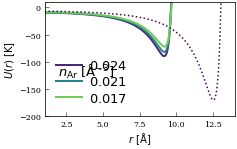

In [57]:
plt.style.reload_library()
with plt.style.context('./include/aps.mplstyle'):

    fig,ax = plt.subplots()
    ax.set_ylim((-100,10))
    ax.set_xlim((1,10.5))
    ax.set_xlabel(r'$r$ $\mathrm{[\AA]}$')
    ax.set_ylabel(r'$U(r)$ $\mathrm{[K]}$')
    #ax.set_title(r'$R_\mathrm{{pore}}={}\ \mathrm{{\AA}}$'.format(R),pad=-20,fontsize=15)

    #cBlue = colortools.get_linear_colors('Blues_r',len(V_NeArr)+5,reverse=False)
    #cRed = colortools.get_linear_colors('Reds_r',effective_potential_Ar.shape[1]+4,reverse=False)

    #ax.plot(r,V_MCM41,linestyle=':',color='k')
    #ax.plot([0], marker='None', linestyle='None', label=r'$n_\mathrm{Ne}\ \mathrm{[\AA^{-3}]}$')
    ax.text(0.07,0.35,r'$n_\mathrm{Ar}\ \mathrm{[\AA^{-3}]}$',transform=ax.transAxes,fontsize=13)

    r = effective_potential_Ar[:,0]
    for j in range(effective_potential_Ar.shape[1] - 1):
        V_eff = effective_potential_Ar[:,j+1]
        ax.plot(r,V_eff,label='${:2.3f}$'.format(argonDensityArr[j]),color=plot_colors[3*j+1], lw=2)
    l = ax.legend(frameon=False,ncol=1,fontsize=13)
    
    ax.plot(r_MCM41,effective_potential_MCM41,color=dark_purple,linestyle=":")
    ax.set_xlim((1,14))
    ax.set_ylim((-200,10))

    #fig.savefig('plots/EP_Ar.svg',bbox_inches='tight')
    #fig.savefig('plots/EP_Ar.png',bbox_inches='tight',dpi=400)
    #fig.savefig('plots/effectivePotential.pdf',bbox_inches='tight')


### Notes on this plot
- move legend to upper right corner
- move lower plot as inset
- use stylefile

In [58]:
min_potential = []
min_potential_location = []
min_potential_density = []

for j in range(effective_potential_Ar.shape[1] - 1):
    idx_min_potential = np.argmin(effective_potential_Ar[r < 10,j+1])
    min_potential.append(effective_potential_Ar[idx_min_potential,j+1])
    min_potential_location.append(r[idx_min_potential])
    min_potential_density.append(argonDensityArr[j])

In [59]:
mins_for_inset_density_r_V = np.load("data/mins_for_inset_density_r_V.npz")
Ar_mins_for_inset_density_r_V = np.load("data/Ar_mins_for_inset_density_r_V.npz")

In [60]:
different_densities=mins_for_inset_density_r_V["min_potential_density"]
r_mins=mins_for_inset_density_r_V["min_potential_location"]
V_mins=mins_for_inset_density_r_V["min_potential"]

In [61]:
argonDensityArr=Ar_mins_for_inset_density_r_V["min_potential_density"]
argonDensityr_mins=Ar_mins_for_inset_density_r_V["min_potential_location"]
argonDensityV_mins=Ar_mins_for_inset_density_r_V["min_potential"]

'cmunrm.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'cmunrm.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


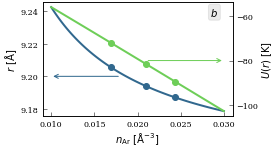

In [62]:
plt.style.reload_library()
with plt.style.context('./include/aps.mplstyle'):
    # Do many densities here and put a line through them, hilight three points from other plot
    fig,ax = plt.subplots()
    ax2 = ax.twinx()
    ax.plot(different_densities,r_mins, color=plot_colors[3], lw=2)
    ax2.plot(different_densities,V_mins, color=plot_colors[-3], lw=2)
    ax.set_xlabel(r'$n_\mathrm{Ar}\ \mathrm{[\AA^{-3}]}$')
    ax.set_ylabel(r'$r$ $\mathrm{[\AA]}$')
    ax2.set_ylabel(r'$U(r)$ $\mathrm{[K]}$')
    ax.annotate("", xy=(0.010,9.2), xytext=(0.018, 9.2), arrowprops=dict(arrowstyle="->",color=plot_colors[3]))
    ax2.annotate("", xy=(0.030,-80), xytext=(0.021, -80), arrowprops=dict(arrowstyle="->",color=plot_colors[-3]))
    ax.scatter(argonDensityArr,argonDensityr_mins,color=plot_colors[3])
    ax2.scatter(argonDensityArr,argonDensityV_mins,color=plot_colors[-3])
    ax.annotate(r"$b$", xy=( 0.90,0.85), xytext=(0.90,0.9),xycoords=ax.transAxes, 
        textcoords='offset points', ha='center', va='bottom',
        bbox=dict(boxstyle='round,pad=0.2', fc='C7', ec='C7', alpha=0.15)
        )
    fig.savefig('plots/effectivePotential_b.pdf',bbox_inches='tight')


In [63]:
argonDensityArr

array([0.02436112, 0.02103558, 0.01691277])

In [64]:
argonDensityV_mins

array([-89.56181775, -81.70047666, -71.97750426])

'cmunrm.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'cmunrm.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


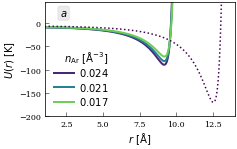

In [65]:
plt.style.reload_library()
with plt.style.context('./include/aps.mplstyle'):

    fig,ax = plt.subplots()
    ax.set_ylim((-100,10))
    ax.set_xlim((1,10.5))
    ax.set_xlabel(r'$r$ $\mathrm{[\AA]}$')
    ax.set_ylabel(r'$U(r)$ $\mathrm{[K]}$')
    #ax.set_title(r'$R_\mathrm{{pore}}={}\ \mathrm{{\AA}}$'.format(R),pad=-20,fontsize=15)

    #cBlue = colortools.get_linear_colors('Blues_r',len(V_NeArr)+5,reverse=False)
    #cRed = colortools.get_linear_colors('Reds_r',effective_potential_Ar.shape[1]+4,reverse=False)

    #ax.plot(r,V_MCM41,linestyle=':',color='k')
    #ax.plot([0], marker='None', linestyle='None', label=r'$n_\mathrm{Ne}\ \mathrm{[\AA^{-3}]}$')
    ax.text(0.10,0.48,r'$n_\mathrm{Ar}\ \mathrm{[\AA^{-3}]}$',transform=ax.transAxes)
    ax.annotate(r"$a$", xy=( 0.10,0.85), xytext=(0.05,0.9),xycoords=ax.transAxes, 
        textcoords='offset points', ha='center', va='bottom',
        bbox=dict(boxstyle='round,pad=0.2', fc='C7', ec='C7', alpha=0.15)
        )
    r = effective_potential_Ar[:,0]
    for j in range(effective_potential_Ar.shape[1] - 1):
        V_eff = effective_potential_Ar[:,j+1]
        ax.plot(r,V_eff,label='${:2.3f}$'.format(argonDensityArr[j]),color=plot_colors[3*j+1], lw=2)
    l = ax.legend(frameon=False,ncol=1,loc=3)
    
    ax.plot(r_MCM41,effective_potential_MCM41,color=dark_purple,linestyle=":")
    ax.set_xlim((1,14))
    ax.set_ylim((-200,45))
    
    #fig.savefig('plots/EP_Ar.svg',bbox_inches='tight')
    #fig.savefig('plots/EP_Ar.png',bbox_inches='tight',dpi=400)
    fig.savefig('plots/effectivePotential.pdf',bbox_inches='tight')

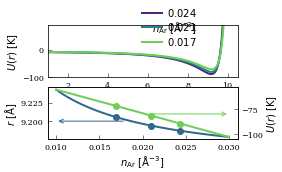

In [66]:
plt.style.reload_library()
with plt.style.context('./include/aps.mplstyle'):

    fig,axes = plt.subplots(nrows=2)
    ax = axes[0]
    axin1 = axes[1]
    ax.set_ylim((-100,90))
    ax.set_xlim((1,10.5))
    ax.set_xlabel(r'$r$ $\mathrm{[\AA]}$')
    ax.set_ylabel(r'$U(r)$ $\mathrm{[K]}$')
    #ax.set_title(r'$R_\mathrm{{pore}}={}\ \mathrm{{\AA}}$'.format(R),pad=-20,fontsize=15)

    #cBlue = colortools.get_linear_colors('Blues_r',len(V_NeArr)+5,reverse=False)
    #cRed = colortools.get_linear_colors('Reds_r',effective_potential_Ar.shape[1]+4,reverse=False)

    #ax.plot(r,V_MCM41,linestyle=':',color='k')
    #ax.plot([0], marker='None', linestyle='None', label=r'$n_\mathrm{Ne}\ \mathrm{[\AA^{-3}]}$')
    ax.text(0.55,0.88,r'$n_\mathrm{Ar}\ \mathrm{[\AA^{-3}]}$',transform=ax.transAxes)

    r = effective_potential_Ar[:,0]
    for j in range(effective_potential_Ar.shape[1] - 1):
        V_eff = effective_potential_Ar[:,j+1]
        ax.plot(r,V_eff,label='${:2.3f}$'.format(argonDensityArr[j]),color=plot_colors[3*j+1], lw=2)
    l = ax.legend(frameon=False,ncol=1,loc=3,bbox_to_anchor=(0.45,0.40))
    
    axin2 = axin1.twinx()
    axin1.plot(different_densities,r_mins, color=plot_colors[3], lw=2)
    axin2.plot(different_densities,V_mins, color=plot_colors[-3], lw=2)
    axin1.set_xlabel(r'$n_\mathrm{Ar}\ \mathrm{[\AA^{-3}]}$')
    axin1.set_ylabel(r'$r$ $\mathrm{[\AA]}$')
    axin2.set_ylabel(r'$U(r)$ $\mathrm{[K]}$')
    axin1.annotate("", xy=(0.010,9.2), xytext=(0.018, 9.2), arrowprops=dict(arrowstyle="->",color=plot_colors[3]))
    axin2.annotate("", xy=(0.030,-80), xytext=(0.021, -80), arrowprops=dict(arrowstyle="->",color=plot_colors[-3]))
    axin1.scatter(argonDensityArr,argonDensityr_mins,color=plot_colors[3])
    axin2.scatter(argonDensityArr,argonDensityV_mins,color=plot_colors[-3])
    
    #fig.savefig('plots/EP_Ar.svg',bbox_inches='tight')
    #fig.savefig('plots/EP_Ar.png',bbox_inches='tight',dpi=400)
    #fig.savefig('plots/effectivePotential.pdf',bbox_inches='tight')

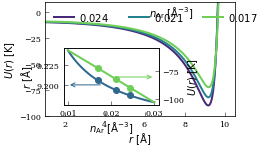

In [67]:
plt.style.reload_library()
with plt.style.context('./include/aps.mplstyle'):

    fig,ax = plt.subplots()
    ax.set_ylim((-100,10))
    ax.set_xlim((1,10.5))
    ax.set_xlabel(r'$r$ $\mathrm{[\AA]}$')
    ax.set_ylabel(r'$U(r)$ $\mathrm{[K]}$')
    #ax.set_title(r'$R_\mathrm{{pore}}={}\ \mathrm{{\AA}}$'.format(R),pad=-20,fontsize=15)

    #cBlue = colortools.get_linear_colors('Blues_r',len(V_NeArr)+5,reverse=False)
    #cRed = colortools.get_linear_colors('Reds_r',effective_potential_Ar.shape[1]+4,reverse=False)

    #ax.plot(r,V_MCM41,linestyle=':',color='k')
    #ax.plot([0], marker='None', linestyle='None', label=r'$n_\mathrm{Ne}\ \mathrm{[\AA^{-3}]}$')
    ax.text(0.55,0.88,r'$n_\mathrm{Ar}\ \mathrm{[\AA^{-3}]}$',transform=ax.transAxes)

    r = effective_potential_Ar[:,0]
    for j in range(effective_potential_Ar.shape[1] - 1):
        V_eff = effective_potential_Ar[:,j+1]
        ax.plot(r,V_eff,label='${:2.3f}$'.format(argonDensityArr[j]),color=plot_colors[3*j+1], lw=2)
    l = ax.legend(frameon=False,ncol=3,loc=2)
    axin1 = ax.inset_axes([0.1, 0.1, 0.5, 0.5])
    axin2 = axin1.twinx()
    axin1.plot(different_densities,r_mins, color=plot_colors[3], lw=2)
    axin2.plot(different_densities,V_mins, color=plot_colors[-3], lw=2)
    axin1.set_xlabel(r'$n_\mathrm{Ar}\ \mathrm{[\AA^{-3}]}$')
    axin1.set_ylabel(r'$r$ $\mathrm{[\AA]}$')
    axin2.set_ylabel(r'$U(r)$ $\mathrm{[K]}$')
    axin1.annotate("", xy=(0.010,9.2), xytext=(0.018, 9.2), arrowprops=dict(arrowstyle="->",color=plot_colors[3]))
    axin2.annotate("", xy=(0.030,-80), xytext=(0.021, -80), arrowprops=dict(arrowstyle="->",color=plot_colors[-3]))
    axin1.scatter(argonDensityArr,argonDensityr_mins,color=plot_colors[3])
    axin2.scatter(argonDensityArr,argonDensityV_mins,color=plot_colors[-3])
    
    #fig.savefig('plots/EP_Ar.svg',bbox_inches='tight')
    #fig.savefig('plots/EP_Ar.png',bbox_inches='tight',dpi=400)
    #fig.savefig('plots/effectivePotential.pdf',bbox_inches='tight')

# Figure 2

In [68]:
density_vs_pressure_data=np.load("data/density_vs_pressure_T4.2.npz")

In [69]:
helium_isotherm_pressure = density_vs_pressure_data["helium_isotherm_pressure"]
helium_isotherm_density = density_vs_pressure_data["helium_isotherm_density"]
qmc_pressure = density_vs_pressure_data["qmc_pressure"]
qmc_density = density_vs_pressure_data["qmc_density"]
qmc_density_error = density_vs_pressure_data["qmc_density_error"]
T=4.2

Text(0.5, 0, '$P/P_0$')

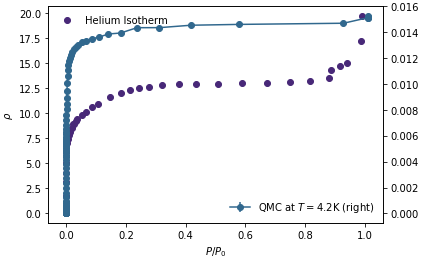

In [70]:
fig,ax = plt.subplots()
ax2 = ax.twinx()
ax.scatter(helium_isotherm_pressure,helium_isotherm_density, label="Helium Isotherm",color=purple)
ax2.errorbar(qmc_pressure,qmc_density,yerr=qmc_density_error, 
             marker='o', label=r"QMC at $T={}\mathrm{{K}}$ (right)".format(T),color=blue)
ax.legend(frameon=False)
ax2.legend(frameon=False)
ax.set_ylabel(r"$\rho$")
ax.set_xlabel(r"$P/P_0$")

In [71]:
mean_qmc_density_flat_idx = (qmc_pressure > .2) & (qmc_pressure < 1)
mean_helium_isotherm_density_flat_idx = (helium_isotherm_pressure > .3) & (helium_isotherm_pressure < .7)

mean_qmc_density_flat = np.mean(qmc_density[mean_qmc_density_flat_idx])
mean_helium_isotherm_density_flat = np.mean(helium_isotherm_density[mean_helium_isotherm_density_flat_idx])

Text(0.5, 0, '$P/P_0$')

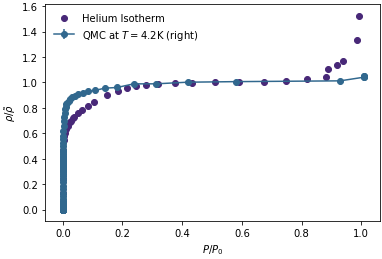

In [72]:
mqdf = mean_qmc_density_flat
mhdf = mean_helium_isotherm_density_flat

fig,ax = plt.subplots()
ax.scatter(helium_isotherm_pressure,helium_isotherm_density/mhdf, label="Helium Isotherm",color=purple)
ax.errorbar(qmc_pressure,qmc_density/mqdf,yerr=qmc_density_error/mqdf, 
             marker='o', label=r"QMC at $T={}\mathrm{{K}}$ (right)".format(T),color=blue)
ax.legend(frameon=False)

ax.set_ylabel(r"$\rho/\tilde{\rho}$")
ax.set_xlabel(r"$P/P_0$")

In [73]:
np.savez("data/chemical_potential_vs_pressure",P_P0=x,T=T,chemical_potential_T0=μ_exp[Tkey(T[0])],chemical_potential_T1=μ_exp[Tkey(T[1])])

NameError: name 'μ_exp' is not defined

In [ ]:
chemical_potential_vs_pressure_data = np.load("data/chemical_potential_vs_pressure.npz")

In [ ]:
P_P0 = chemical_potential_vs_pressure_data["P_P0"]
T_ = chemical_potential_vs_pressure_data["T"]
chemical_potential_T0 = chemical_potential_vs_pressure_data["chemical_potential_T0"]
chemical_potential_T1 = chemical_potential_vs_pressure_data["chemical_potential_T1"]
μ_exp=[chemical_potential_T0,chemical_potential_T1]

In [ ]:
fig,ax = plt.subplots()
_colors = [green,dark_blue]
for i,cT in enumerate(T_):
    ax.plot(P_P0,μ_exp[i], label=f'T = {cT:3.1f} K', color=_colors[i])

#plt.yscale('symlog')
ax.set_xscale('log')
ax.set_ylabel(r'$\mu\; \mathrm{[K]}$')
ax.set_xlabel(r'$P/P_0$')
ax.set_xlim(1E-6,1.01)
ax.legend(frameon=False)

In [ ]:
mqdf = mean_qmc_density_flat
mhdf = mean_helium_isotherm_density_flat
plt.style.reload_library()
with plt.style.context('./include/aps.mplstyle'):
    fig,ax = plt.subplots()
    axin = ax.inset_axes([0.45, 0.15, 0.4, 0.4])
    _colors = [green,dark_blue]
    for i,cT in enumerate(T_):
        axin.plot(P_P0,μ_exp[i], label=f'T = {cT:3.1f} K', color=_colors[i])

    #plt.yscale('symlog')
    axin.set_xscale('log')
    axin.set_ylabel(r'$\mu\; \mathrm{[K]}$')
    #axin.set_xlabel(r'$P/P_0$')
    axin.set_xlim(1E-6,1.01)
    axin.legend(frameon=False)

    ax.scatter(helium_isotherm_pressure,helium_isotherm_density/mhdf, label="Helium Isotherm",color=purple)
    ax.errorbar(qmc_pressure,qmc_density/mqdf,yerr=qmc_density_error/mqdf, 
                 marker='o', label=r"QMC at $T={}\mathrm{{K}}$ (right)".format(T),color=blue)
    ax.legend(frameon=False)

    #ax.set_ylabel(r"$\rho/\tilde{\rho}$")
    ax.set_ylabel(r"$\rho/\rho_0$")
    ax.set_xlabel(r"$P/P_0$")
    fig.savefig('plots/filling_the_pore.pdf',bbox_inches='tight')

# Fig 3: radial density

In [ ]:
radial_density_data = np.load("data/radial_density_T1.6.npz")

In [ ]:
chemical_potential_radial = radial_density_data["chemical_potential"]
reduced_pressure_radial = radial_density_data["reduced_pressure"]
radial = radial_density_data["radial"]


In [ ]:
μ = chemical_potential_radial
μmin = -50
colors2 = colortools.get_linear_colors('viridis',len(μ[μ>μmin]),reverse=False)
black = "k"
fig,ax = plt.subplots()
for i,u in enumerate(μ):
    if (u > μmin):
        x = radial[i][0,:]
        y = radial[i][1,:]
        yerr = radial[i][2,:]
        ax.errorbar(x,y,yerr, marker='o', lw=0.5, ms=1, color=colors2[i], label=r'$\mu={:f}$'.format(μ[i]))
        #ax.errorbar(x,y,yerr, marker='o', color=colors2[i], label=r'$\mu={:f}$'.format(μ[i]))
        
#ax.legend(frameon=False)

ax.set_xlabel(r'Distance From Center $(\mathrm{\AA})$')
ax.set_xlim(0,11);
# ax.xaxis.set_major_locator(ticker.MultipleLocator(2.5))
# [ax.spines[sp].set_color(black) for sp in ['bottom','top','left','right']]
# ax.xaxis.label.set_color(black)
# ax.tick_params(which='both', colors=black)

ax.set_ylabel(r'Radial Density $(\mathrm{\AA}^{-3})$')

# create the colorbar
sm = plt.cm.ScalarMappable(cmap=mpl.cm.viridis_r, norm=plt.Normalize(vmin=μ[0], vmax=μmin))
sm._A = []
cb = plt.colorbar(sm)
cb.set_label(r'$\mu\; (\mathrm{K})$')

# set colorbar tick color
# cb.ax.yaxis.set_tick_params(color=black)
# set colorbar edgecolor 
# cb.outline.set_edgecolor(black)
# set colorbar ticklabels
plt.setp(plt.getp(cb.ax.axes, 'yticklabels'))
fig.savefig('plots/radialDensity.pdf',bbox_inches='tight')

In [ ]:
ρ_min = reduced_pressure_radial[chemical_potential_radial == -50]

In [ ]:
μ = chemical_potential_radial
μmin = -50
colors2 = colortools.get_linear_colors('viridis',len(μ[μ>μmin]),reverse=False)
black = "k"
plt.style.reload_library()
with plt.style.context('./include/aps.mplstyle'):
    fig,ax = plt.subplots()
    for i,u in enumerate(μ):
        if (u > μmin):
            x = radial[i][0,:]
            y = radial[i][1,:]
            yerr = radial[i][2,:]
            ax.errorbar(x,y,yerr, marker='o', lw=0.5, ms=1, color=colors2[i], label=r'$\mu={:f}$'.format(μ[i]))
            #ax.errorbar(x,y,yerr, marker='o', color=colors2[i], label=r'$\mu={:f}$'.format(μ[i]))

    #ax.legend(frameon=False)

    ax.set_xlabel(r'Distance From Center $(\mathrm{\AA})$')
    ax.set_xlim(0,11);
    # ax.xaxis.set_major_locator(ticker.MultipleLocator(2.5))
    # [ax.spines[sp].set_color(black) for sp in ['bottom','top','left','right']]
    # ax.xaxis.label.set_color(black)
    # ax.tick_params(which='both', colors=black)

    ax.set_ylabel(r'Radial Density $(\mathrm{\AA}^{-3})$')

    # create the colorbar
    vmin = reduced_pressure_radial[0]
    vmax = ρ_min
    sm = plt.cm.ScalarMappable(cmap=mpl.cm.viridis_r, norm=mplcolors.LogNorm(vmin=vmin, vmax=vmax))
    sm._A = []
    cb = plt.colorbar(sm)
    cb.set_label(r"$P/P_0$")

    # set colorbar tick color
    # cb.ax.yaxis.set_tick_params(color=black)
    # set colorbar edgecolor 
    # cb.outline.set_edgecolor(black)
    # set colorbar ticklabels
    plt.setp(plt.getp(cb.ax.axes, 'yticklabels'))
    fig.savefig('plots/radialDensity.pdf',bbox_inches='tight')

# Figure 4: linear density

In [ ]:
linear_density_data = np.load("data/linear_density.npz")

In [ ]:
chemical_potential_linear = linear_density_data["chemical_potential"]
reduced_pressure_linear = linear_density_data["reduced_pressure"]
T_linear = linear_density_data["T"]
linear_density = linear_density_data["linear_density"]

In [ ]:
black = "k"
μmin = -50
#fig, axes = plt.subplots(1,1,sharex=False, sharey=True, squeeze=True)
fig, ax = plt.subplots()
colors2 = colortools.get_linear_colors('viridis',len(μ[μ>μmin]),reverse=False)
μ_l = chemical_potential_linear
P_l = reduced_pressure_linear
ρlin = linear_density
_m = ["o","s"]
for i,cT in enumerate(T_linear):
    x = μ_l[i][μ>μmin]
    y = ρlin[i][μ>μmin]
    for j,u in enumerate(x):
        ax.plot(u,y[j],lw=1, marker=_m[i], mec=colors2[j], markersize=6,
                 mfc=colortools.get_alpha_hex(colors2[j],0.7),zorder=10)

        ax.plot(x[j-1:j+1],y[j-1:j+1],lw=1, marker='None', linestyle='-', color=colors2[j])


#axes.set_xlim(-40,-5)

#axes.set_xlabel(r'$P/P_0$', color=black, fontsize=20)

# [ax.spines[sp].set_color(black) for sp in ['bottom','top','left','right']]
# ax.xaxis.label.set_color(black)
# ax.tick_params(which='both', colors=black)

#axes.set_xscale('log')
#axes.set_xlim(1E-10,1)
#axes.set_ylim(0,0.018)

ax.set_xlabel(r'$\mu\; (\mathrm{K})$')
ax.set_ylabel(r'Core Density $(\mathrm{\AA}^{-1})$')


In [ ]:
black = "k"
μmin = -50
#fig, axes = plt.subplots(1,1,sharex=False, sharey=True, squeeze=True)
plt.style.reload_library()
with plt.style.context('./include/aps.mplstyle'):
    fig, ax = plt.subplots()
    colors2 = colortools.get_linear_colors('viridis',len(μ[μ>μmin]),reverse=False)
    μ_l = chemical_potential_linear
    P_l = reduced_pressure_linear
    ρlin = linear_density
    _m = ["o","s"]
    for i,cT in enumerate(T_linear):
        x = P_l[i][μ>μmin]
        y = ρlin[i][μ>μmin]
        for j,u in enumerate(x):
            ax.plot(u,y[j],lw=1, marker=_m[i], mec=colors2[j], markersize=6,
                     mfc=colortools.get_alpha_hex(colors2[j],0.7),zorder=10)

            ax.plot(x[j-1:j+1],y[j-1:j+1],lw=1, marker='None', linestyle='-', color=colors2[j])
        ax.plot([None],[None],color=blue,mec=blue,mfc=colortools.get_alpha_hex(blue,0.7),label=f'T = {cT:3.1f} K',marker=_m[i])


    #axes.set_xlim(-40,-5)

    #axes.set_xlabel(r'$P/P_0$', color=black, fontsize=20)

    # [ax.spines[sp].set_color(black) for sp in ['bottom','top','left','right']]
    # ax.xaxis.label.set_color(black)
    # ax.tick_params(which='both', colors=black)
    ax.legend(frameon=False)
    ax.set_xscale('log')
    #ax.set_xlim(1E-10,1)
    #ax.set_ylim(0,0.018)

    ax.set_xlabel(r'$\mu\; (\mathrm{K})$')
    ax.set_ylabel(r'Core Density $(\mathrm{\AA}^{-1})$')
    ax.set_xlabel(r"$P/P_0$")
    fig.savefig('plots/linearDensity.pdf',bbox_inches='tight')

# finite size effects

In [ ]:
finite_size_effect_radial_data = np.load("data/finite_size_effect_radial.npz")

In [ ]:
L_fse = finite_size_effect_radial_data["L"]
distance_from_center_fse = finite_size_effect_radial_data["distance_from_center"]
radial_density_fse = finite_size_effect_radial_data["radial_density"]
radial_density_error_fse = finite_size_effect_radial_data["radial_density_error"]


In [ ]:
L_fse

In [ ]:
plt.style.reload_library()
with plt.style.context('./include/aps.mplstyle'):
    fig,ax = plt.subplots()
    _colors= [dark_purple,dark_blue,green,teal]
    for i,cL in enumerate(L_fse):
        x = distance_from_center_fse[i]
        y = radial_density_fse[i]
        yerr = radial_density_error_fse[i]
        ax.errorbar(x,y,yerr,label="$L={}\ \mathrm{{\AA}}$".format(cL),color=_colors[i])
    ax.legend(frameon=False,ncol = 1)
    ax.set_xlim((0,2))
    fig.savefig('plots/finite_size_scaling_radial_density.pdf',bbox_inches='tight')